In [15]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import re

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
# import data
filename = 'titanic_train.csv'

titanic_df = pd.read_csv(filename, delimiter=',')

# display the first five rows of the data set
titanic_df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [17]:
# size of the data set
print("Number of columns: {}, Number of rows: {}".format(titanic_df.shape[1], titanic_df.shape[0]))
print()

# data types of the different variables
titanic_df.dtypes

Number of columns: 12, Number of rows: 891



PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
# summary of numerical data
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
# summary of categorical data
print(titanic_df.describe(include=['O']))

                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644


In [20]:
# drop unwanted columns
titanic_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

# check if it worked properly by displaying the remaining column headers
print(titanic_df.columns.values)

['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked']


In [22]:
# round up age to the closest integer
titanic_df['Age'] = np.ceil(titanic_df['Age'])

In [23]:
age_mean = titanic_df['Age'].mean()
age_std = titanic_df['Age'].std()

# count the number of missing values in the age column
age_nan_count = titanic_df['Age'].isnull().sum()

# create a vector containing the same number of values from the interval specified above
nan_replacement = np.random.randint(age_mean - age_std, age_mean + age_std, size=age_nan_count)

# replace the missing values with the random numbers
titanic_df.loc[titanic_df['Age'].isnull(), 'Age'] = nan_replacement

# check if all values have been replaced
print("Remaining NaN values: {}".format(titanic_df['Age'].isnull().sum()))

Remaining NaN values: 0


In [24]:
# replace NaN values with S
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

# check if all values have been replaced
print("Remaining NaN values: {}".format(titanic_df['Embarked'].isnull().sum()))

Remaining NaN values: 0


In [25]:
# female equals 0 and male equals 1 in the sex column
titanic_df['Sex'] = titanic_df['Sex'].map({'female': 0, 'male': 1})

# C = 0, Q = 1, S = 2 in the embarked column
titanic_df['Embarked'] = titanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# check if all the values have been remapped
print("Unique values 'Sex': {}".format(titanic_df['Sex'].unique()))
print()
print("Unique values 'Embarked': {}".format(titanic_df['Embarked'].unique()))

Unique values 'Sex': [1 0]

Unique values 'Embarked': [2 0 1]


In [26]:
def get_title(name):
    """Extract the title from the passenger name."""
    # try to find the pattern, returns None if nothing is found
    title_search = re.search(' ([A-Za-z]+)\.', name)
    
    # return the title if one is found
    if title_search:
        return title_search.group(1)
    # return an empty string if no match has been found
    else:
        return ""

# create the new feature column
titanic_df['Title'] = titanic_df['Name'].apply(get_title)

# print out all the different titles found
print(titanic_df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [28]:
# calculate the family size
titanic_df['FamSize'] = titanic_df["SibSp"] 

C:\Users\Abhimanyu Singh\AppData\Local\Temp\ipykernel_3196\2571135039.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = titanic_df.corr()


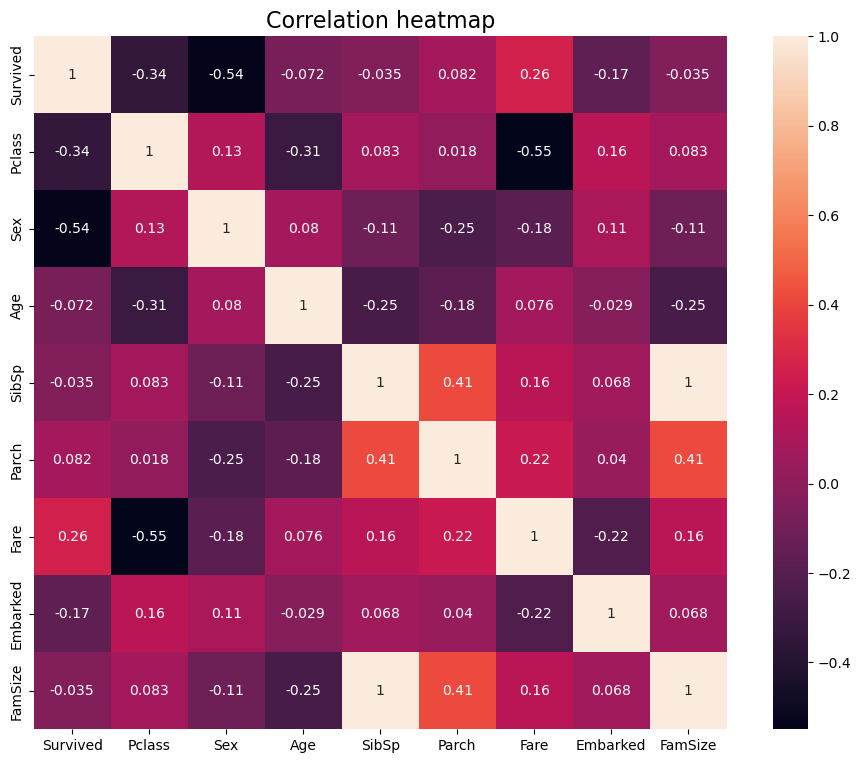

In [30]:
# calculate the correlation matrix
corr_mat = titanic_df.corr()

# create the heatmap plot using seaborn
fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_mat, annot=True, square=True)

plt.title("Correlation heatmap", size=16)

plt.show()

In [31]:
# Pclass
titanic_df[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [32]:
# Sex
sex_survival = titanic_df[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()

# remapping
sex_survival.loc[sex_survival['Sex'] == 0, 'Sex'] = 'female'
sex_survival.loc[sex_survival['Sex'] == 1, 'Sex'] = 'male'

sex_survival

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [33]:
# Embarked
embarked_survival = titanic_df[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean()

# remapping
embarked_survival.loc[embarked_survival['Embarked'] == 0, 'Embarked'] = 'C'
embarked_survival.loc[embarked_survival['Embarked'] == 1, 'Embarked'] = 'Q'
embarked_survival.loc[embarked_survival['Embarked'] == 2, 'Embarked'] = 'S'

embarked_survival

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [34]:
# summary statistics for passengers from Cherbourg
titanic_df[titanic_df['Embarked'] == 0].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.0,168.000000
mean,0.553571,1.886905,0.565476,30.589286,0.386905,0.363095,59.954144,0.0,0.386905
std,0.498608,0.944100,0.497176,14.061171,0.557213,0.660481,83.912994,0.0,0.557213
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.012500,0.0,0.000000
25%,0.000000,1.000000,0.000000,22.000000,0.000000,0.000000,13.697950,0.0,0.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,29.700000,0.0,0.000000
75%,1.000000,3.000000,1.000000,39.000000,1.000000,1.000000,78.500025,0.0,1.000000
max,1.000000,3.000000,1.000000,71.000000,2.000000,3.000000,512.329200,0.0,2.000000


In [35]:
# create a new age group column in the data frame
titanic_df['AgeGroup'] = 0

# labels for the different age groups
age_groups = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'] # age groups

# split the passengers into age groups of 10 years
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], range(0, 90, 10), labels=age_groups)

def age_group_summary(df, age_groups):
    """Create a result summary for the different age groups."""
    # calculate the survival rates and counts for the different age groups
    age_survival = df[['AgeGroup', 'Survived']].groupby('AgeGroup').agg(['mean', 'count', 'sum'])
    
    # reindex to get the correct order in the calculated data frame
    age_survival = age_survival.reindex(age_groups)
    
    # change the column headers
    age_survival.columns = age_survival.columns.droplevel() # remove multilevel index
    age_survival.columns = ['Survival rate', 'Total', 'Survived']
    
    # create a new column containing the number of passengers that died
    age_survival['Died'] = age_survival['Total'] - age_survival['Survived']
    
    return age_survival
    
# calculate the survival rates for the different age groups
age_survival = age_group_summary(titanic_df, age_groups)

age_survival

,Survival rate,Total,Survived,Died
AgeGroup,,,,
1-10,0.593750,64,38,26
11-20,0.360544,147,53,94
21-30,0.361486,296,107,189
31-40,0.397260,219,87,132
41-50,0.346535,101,35,66
51-60,0.404762,42,17,25
61-70,0.235294,17,4,13
71-80,0.200000,5,1,4


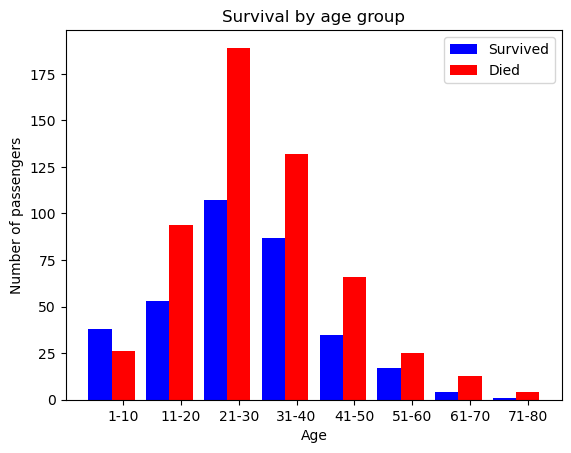

In [36]:
# vector for the bar positions
ind = np.arange(len(age_survival))

# bar width
width = 0.4

# bar plot
fig, ax = plt.subplots()

survived = age_survival['Survived'].values
bar1 = ax.bar(ind, survived, width=width, color='blue', label='Survived')

died = age_survival['Died'].values
bar2 = ax.bar(ind + width, died, width=width, color='red', 
              label='Died')

# format plot
ax.set(xlabel='Age', xticks=(ind + width), xticklabels=age_groups, ylabel='Number of passengers', 
       title='Survival by age group')
plt.legend()

plt.show()

In [37]:
# calculate the survival rates for the different family sizes
fam_survival = titanic_df[['FamSize', 'Survived']].groupby('FamSize').mean()

fam_survival

,Survived
FamSize,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


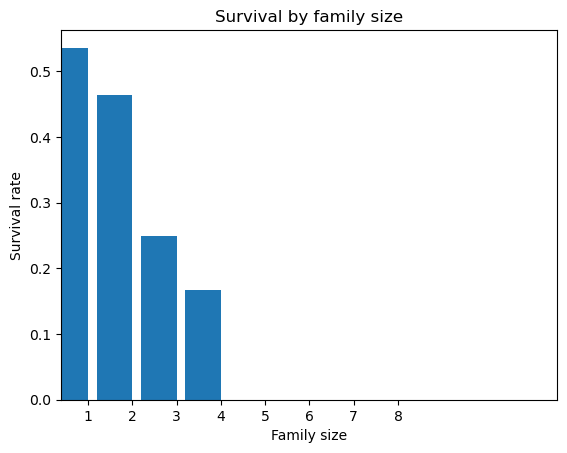

In [38]:
# vector for the bar positions
ind = np.arange(1, np.max(fam_survival.index.values) + 1) 

# add empty entries to the survival rates to get the same number of data points as in the bar position vector
fam_survival = fam_survival.reindex(ind)

# bar width
width = 0.8

# bar plot
fig, ax = plt.subplots()

survival_rates = fam_survival['Survived'].values
ax.bar(ind, survival_rates, width)

# format plot
ax.set(xlabel='Family size', xticks=ind + width/2, xticklabels=ind.astype(int), xlim=[0.8, 12], ylabel='Survival rate', 
       title='Survival by family size')

plt.show()

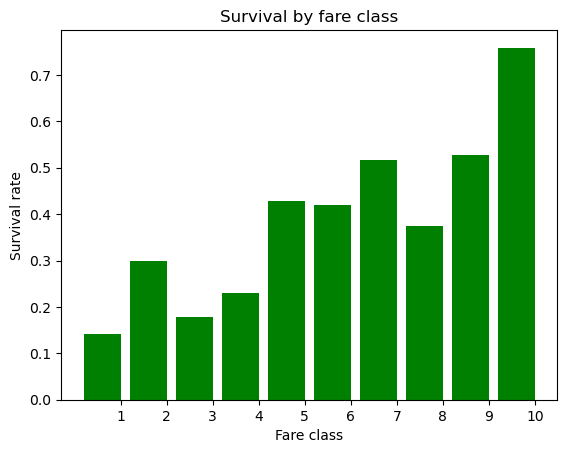

In [39]:
# create a new feature column containing the fare class
titanic_df["FareClass"] = pd.qcut(titanic_df['Fare'], 10)

# calculate the mean survival rates for all fare classes
fare_survival = titanic_df[['FareClass', 'Survived']].groupby(['FareClass']).mean()

# vector for the bar positions
ind = np.arange(len(fare_survival)) 

# bar width
width = 0.8

# bar plot
fig, ax = plt.subplots()

ax.bar(ind, fare_survival['Survived'], width, color='green')

# format plot
ax.set(xlabel='Fare class', xticks=(ind + width/2), xticklabels=np.arange(1, 11), ylabel='Survival rate', 
       title='Survival by fare class')

plt.show()

In [40]:
# calculate the mean survival rates for all title groups
title_survival = titanic_df[['Title', 'Sex', 'Survived']].groupby(['Title']).mean().sort_values('Survived', ascending=False)
title_survival

,Sex,Survived
Title,,
Sir,1.000000,1.000000
Countess,0.000000,1.000000
Ms,0.000000,1.000000
Mme,0.000000,1.000000
Lady,0.000000,1.000000
Mlle,0.000000,1.000000
Mrs,0.000000,0.792000
Miss,0.000000,0.697802
Master,1.000000,0.575000


In [ ]:
 As per my conclusion drawn from the above dataset that women, childern and the upper class have the most chances of survival.